## ContentSerialize

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

os.chdir('..')

In [2]:
from textlong.serialize import ContentSerialize

### add_item

In [3]:
c = ContentSerialize()
print(c)

<ContentSerialize id:0, children:[]>


In [4]:
c.add_item()
c.add_item()
print(c)

<ContentSerialize id:0, children:['<id:0.1>', '<id:0.2>']>


In [5]:
print(c)

<ContentSerialize id:0, children:['<id:0.1>', '<id:0.2>']>


In [6]:
c._children

{1: <textlong.serialize.ContentSerialize at 0x1083c43d0>,
 2: <textlong.serialize.ContentSerialize at 0x1083c4460>}

In [7]:
c._children[2].add_item()
c._children[2].add_item()

In [8]:
print(c._children[2])

<ContentSerialize id:0.2, children:['<id:0.2.1>', '<id:0.2.2>']>


### get_item_by_id

In [9]:
c.id

'0'

In [10]:
print(c.get_item_by_id('0'))

<ContentSerialize id:0, children:['<id:0.1>', '<id:0.2>']>


In [11]:
print(c.get_item_by_id("0.1"))

<ContentSerialize id:0.1, children:[]>


In [12]:
print(c.get_item_by_id("0.2").get_item_by_id("2.1"))

<ContentSerialize id:0.2.1, children:[]>


In [13]:
print(c.get_item_by_id("0.2.1"))

<ContentSerialize id:0.2.1, children:[]>


### base-dump

In [14]:
c = ContentSerialize()
c.dump()

{'id': '0'}


In [15]:
c.add_item()
c.add_item()
c.dump()

{'id': '0'}
{'id': '0.1'}
{'id': '0.2'}


In [16]:
print(c)

<ContentSerialize id:0, children:['<id:0.1>', '<id:0.2>']>


In [17]:
c.all_content

[{'id': '0'}, {'id': '0.1'}, {'id': '0.2'}]

### base-load

In [18]:
c_new = ContentSerialize()
c_new.load()

['0.json', '0.1.json', '0.2.json']


### content-dump

In [19]:
from textlong.node import ContentNode
n = ContentNode()
n.add_item(title="ABC")
n2 = n.add_item(title="XYZ")
n2.add_item(howto="你好好写")
n2.add_item()

n.dump()

{'id': '0', 'type': 'unknown', 'state': 'init', 'is_complete': False, 'is_draft': False, 'words_advice': None, 'title': '', 'howto': '', 'summarise': None, 'text': ''}
{'id': '0.1', 'type': 'unknown', 'state': 'init', 'is_complete': False, 'is_draft': False, 'words_advice': None, 'title': 'ABC', 'howto': '', 'summarise': None, 'text': ''}
{'id': '0.2', 'type': 'unknown', 'state': 'init', 'is_complete': False, 'is_draft': False, 'words_advice': None, 'title': 'XYZ', 'howto': '', 'summarise': None, 'text': ''}
{'id': '0.2.1', 'type': 'unknown', 'state': 'init', 'is_complete': False, 'is_draft': False, 'words_advice': None, 'title': '', 'howto': '你好好写', 'summarise': None, 'text': ''}
{'id': '0.2.2', 'type': 'unknown', 'state': 'init', 'is_complete': False, 'is_draft': False, 'words_advice': None, 'title': '', 'howto': '', 'summarise': None, 'text': ''}


In [20]:
n.all_content

[{'id': '0',
  'type': 'unknown',
  'state': 'init',
  'is_complete': False,
  'is_draft': False,
  'words_advice': None,
  'title': '',
  'howto': '',
  'summarise': None,
  'text': ''},
 {'id': '0.1',
  'type': 'unknown',
  'state': 'init',
  'is_complete': False,
  'is_draft': False,
  'words_advice': None,
  'title': 'ABC',
  'howto': '',
  'summarise': None,
  'text': ''},
 {'id': '0.2',
  'type': 'unknown',
  'state': 'init',
  'is_complete': False,
  'is_draft': False,
  'words_advice': None,
  'title': 'XYZ',
  'howto': '',
  'summarise': None,
  'text': ''},
 {'id': '0.2.1',
  'type': 'unknown',
  'state': 'init',
  'is_complete': False,
  'is_draft': False,
  'words_advice': None,
  'title': '',
  'howto': '你好好写',
  'summarise': None,
  'text': ''},
 {'id': '0.2.2',
  'type': 'unknown',
  'state': 'init',
  'is_complete': False,
  'is_draft': False,
  'words_advice': None,
  'title': '',
  'howto': '',
  'summarise': None,
  'text': ''}]

### content-load

['0.json', '0.1.json', '0.2.json', '0.2.1.json', '0.2.2.json']


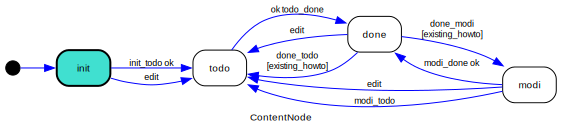

In [21]:
n_new = ContentNode()
n_new.load()

In [22]:
print(n_new)
print(n_new.get_item_by_id("0.2"))
print(n_new.get_outlines())

<ContentNode id:0, children:['<id:0.1>', '<id:0.2>']>
<ContentNode id:0.2, children:['<id:0.2.1>', '<id:0.2.2>']>
0  
  扩写指南 >>> 
  内容摘要 >>> None
0.1 ABC 
  扩写指南 >>> 
  内容摘要 >>> None
0.2 XYZ 
  扩写指南 >>> 
  内容摘要 >>> None
0.2.1  
  扩写指南 >>> 你好好写
  内容摘要 >>> None
0.2.2  
  扩写指南 >>> 
  内容摘要 >>> None


In [24]:
n_new._project_id

'default'